In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastcore import *
from pathlib2 import Path
import json
import pandas as pd
import coco_text
import skimage.io as io
import pylab
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
Path().absolute()

PosixPath('/home/paperspace/nbs')

In [4]:
path_coco = Path('/home/paperspace/data/coco')

In [5]:
img_dir = Path('/home/paperspace/data/coco/images/train2014/')
annotations = Path('/home/paperspace/data/coco/annotations/COCO_Text.json')

In [6]:
annotations

PosixPath('/home/paperspace/data/coco/annotations/COCO_Text.json')

In [7]:
ct_anno = coco_text.COCO_Text(annotations)

loading annotations into memory...
0:00:02.216931
creating index...
index created!


In [8]:
ct_anno.info()

url: http://vision.cornell.edu/se3/coco-text/
date_created: 2017-03-28
version: 1.4
description: This is 1.4 version of the 2017 COCO-Text dataset.
author: COCO-Text group


In [9]:
imgs = ct_anno.getImgIds(imgIds=ct_anno.train) 
#catIds=[('legibility','legible'),('class','machine printed')])

In [10]:
anns = ct_anno.getAnnIds(imgIds=ct_anno.train) 
                        #catIds=[('legibility','legible'),('class','machine printed')], 
                        #areaRng=[0,200])

In [11]:
# get all images containing at least one instance of legible text
imgIds = ct_anno.getImgIds(imgIds=ct_anno.train, catIds=[('legibility','legible')])
# pick one at random
img = ct_anno.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

/home/paperspace/data/coco/images/train2014/COCO_train2014_000000218982.jpg


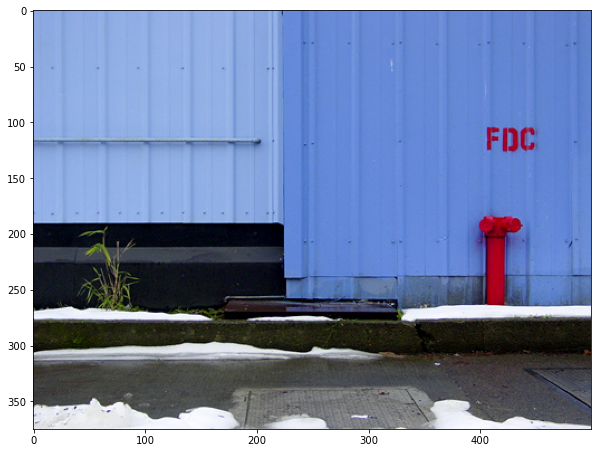

In [12]:
dataType = 'train2014'


I = io.imread('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
print('%s/images/%s/%s'%(path_coco,dataType,img['file_name']))
plt.figure()
plt.imshow(I)

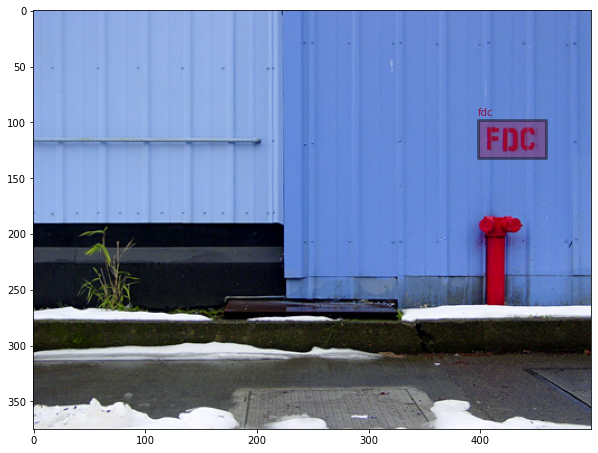

In [13]:
plt.imshow(I)
annIds = ct_anno.getAnnIds(imgIds=img['id'])
anns = ct_anno.loadAnns(annIds)
ct_anno.showAnns(anns)

In [14]:
img

{'width': 500,
 'file_name': 'COCO_train2014_000000218982.jpg',
 'set': 'train',
 'id': 218982,
 'height': 375}

In [15]:
anns

[{'polygon': [397.5252323150635,
   97.94878196716309,
   458.785436630249,
   97.94878196716309,
   458.785436630249,
   131.4800205230713,
   397.5252323150635,
   131.4800205230713],
  'language': 'english',
  'area': 2054.1305248761637,
  'id': 1042011,
  'utf8_string': 'fdc',
  'image_id': 218982,
  'bbox': [397.5252323150635,
   97.94878196716309,
   61.26020431518555,
   33.5312385559082],
  'legibility': 'legible',
  'class': 'machine printed'}]

In [16]:
train_imgs = ct_anno.loadImgs(ct_anno.train)

In [17]:
len(train_imgs)

43686

In [18]:
train_imgs[0]

{'width': 612,
 'file_name': 'COCO_train2014_000000378466.jpg',
 'set': 'train',
 'id': 378466,
 'height': 612}

In [19]:
train_anno_ids = ct_anno.getAnnIds(ct_anno.train)

In [20]:
len(train_anno_ids)

118309

In [21]:
type(train_anno_ids[0])

int

In [22]:
train_annos = ct_anno.loadAnns(train_anno_ids)

In [23]:
len(train_annos)

118309

In [24]:
train_annos[0]['bbox']

[212.35294117647058,
 108.67088607594941,
 25.815126050420183,
 17.215189873417717]

In [25]:
sz = 224

images = train_imgs
lbl_bbox = pd.DataFrame()


for im in range(len(images)):
    img_bbox = train_annos[im]['bbox']
    img_id = train_imgs[im]['id']
    #print(img_bbox)
    lbl_bbox = lbl_bbox.append(pd.DataFrame({'Image_id: ' : img_id, 'bbox: ' : img_bbox}), ignore_index=True)
    #lbl_bbox = pd.concat({'Image_id: ' : img_id}, {'bbox: ' : img_bbox})
    


In [26]:
lbl_bbox.head(10)

,Image_id:,bbox:
0,378466,212.352941
1,378466,108.670886
2,378466,25.815126
3,378466,17.215190
4,287140,617.865546
5,287140,179.683544
6,287140,21.134454
7,287140,43.037975
8,332243,108.000000
9,332243,105.000000


In [27]:
from fastai.vision.all import *

In [28]:
img_names = get_image_files(img_dir)

In [29]:
print(img_names[1])

/home/paperspace/data/coco/images/train2014/COCO_train2014_000000239726.jpg


In [35]:
def get_annotations_text(fname, prefix=None):
    "Open a COCO style json in `fname` and returns the lists of filenames (with maybe `prefix`) and labelled bboxes."
    annot_dict = json.load(open(fname))
    id2images, id2bboxes = {}, collections.defaultdict(list),
    #classes = {o['id']:o['name'] for o in annot_dict['cats']}
    for o in annot_dict['anns']:
        bb = o['bbox']
        id2bboxes[o['image_id']].append([bb[0],bb[1], bb[0]+bb[2], bb[1]+bb[3]])
        #id2cats[o['image_id']].append(classes[o['category_id']])
    id2images = {o['id']:ifnone(prefix, '') + o['file_name'] for o in annot_dict['imgs'] if o['id'] in id2bboxes}
    ids = list(id2images.keys())
    return [id2images[k] for k in ids]

In [31]:
annotationss = json.load(open(annotations))

In [32]:
annotations

PosixPath('/home/paperspace/data/coco/annotations/COCO_Text.json')

In [33]:
for category in annotationss['imgs']:
    print ('Categories:', category)

Categories: 378466
Categories: 287140
Categories: 332243
Categories: 370250
Categories: 11544
Categories: 370252
Categories: 370258
Categories: 36606
Categories: 286892
Categories: 286897
Categories: 19397
Categories: 581605
Categories: 256908
Categories: 35547
Categories: 581601
Categories: 19391
Categories: 281774
Categories: 103549
Categories: 123855
Categories: 103547
Categories: 241611
Categories: 182728
Categories: 479864
Categories: 113991
Categories: 493659
Categories: 244768
Categories: 120120
Categories: 215304
Categories: 304548
Categories: 498601
Categories: 120125
Categories: 120127
Categories: 410345
Categories: 235388
Categories: 359104
Categories: 359106
Categories: 58143
Categories: 523055
Categories: 82990
Categories: 413923
Categories: 413922
Categories: 311179
Categories: 173150
Categories: 413927
Categories: 458336
Categories: 458339
Categories: 311174
Categories: 88398
Categories: 311173
Categories: 279503
Categories: 527748
Categories: 353884
Categories: 515065
C

list

In [36]:
test_images, test_lbl_bbox = get_annotations_text(annotations)
'''
annotations_ = json.load(open(coco/'train.json'))
categories, images, annots = map(lambda x:L(x),annotations_.values())
'''

TypeError: string indices must be integers